#Import Libraries:

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Upload Dataset:

In [78]:
data= pd.read_csv('/content/Students_Stress_Dataset1.csv')

#Overview Dataset:

In [79]:
print(data.head())

   student_id study_hours  sleep_hours  anxiety_level  exam_pressure  \
0  291.733040         4.3     7.664576       2.980659            NaN   
1  183.821285         3.5     8.215415       1.870683       3.064728   
2  105.141636         3.7     8.132309       1.931411       2.912442   
3  186.140112           4     7.827750       3.076027       3.712450   
4         NaN         5.8     6.894824       5.552317       6.794798   

   breaks_per_day  stress_level college_name gender      cgpa  
0        5.034686      4.012997          UET      F  3.372174  
1        5.907628      3.021036         FAST      M  3.664360  
2        5.935501      2.965371      COMSATS      F  3.683942  
3        5.022947      4.144491         LUMS      M  3.396959  
4        3.062487      7.004442         FAST      M  2.924930  


In [80]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8240 entries, 0 to 8239
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   student_id      7881 non-null   float64
 1   study_hours     7817 non-null   object 
 2   sleep_hours     7874 non-null   float64
 3   anxiety_level   7883 non-null   float64
 4   exam_pressure   7877 non-null   float64
 5   breaks_per_day  7872 non-null   float64
 6   stress_level    7873 non-null   float64
 7   college_name    7865 non-null   object 
 8   gender          7868 non-null   object 
 9   cgpa            7878 non-null   float64
dtypes: float64(7), object(3)
memory usage: 643.9+ KB
None


In [81]:
print(data.describe())

        student_id  sleep_hours  anxiety_level  exam_pressure  breaks_per_day  \
count  7881.000000  7874.000000    7883.000000    7877.000000     7872.000000   
mean    376.980300     7.145093       4.833684       5.845238        4.113989   
std     211.997100     0.842287       2.669736       2.887482        1.902364   
min     -22.752232    -0.047596      -0.211537      -1.094637       -5.099081   
25%     223.000000     6.668021       2.994457       3.988729        3.000000   
50%     347.188244     7.114119       4.676842       5.722431        4.000000   
75%     545.000000     7.799954       6.854508       7.841236        5.010556   
max     827.901331    11.065093      40.128710      50.224697       30.106239   

       stress_level         cgpa  
count   7873.000000  7878.000000  
mean       5.528766     3.219872  
std        2.210561     1.206679  
min       -3.000000    -2.522478  
25%        3.997300     2.928863  
50%        5.764552     3.165292  
75%        7.000000     3

#Data Preprocessing:

In [82]:
data = data.drop(columns=["student_id"])

In [83]:
data.head(2)

,study_hours,sleep_hours,anxiety_level,exam_pressure,breaks_per_day,stress_level,college_name,gender,cgpa
0,4.3,7.664576,2.980659,NaN,5.034686,4.012997,UET,F,3.372174
1,3.5,8.215415,1.870683,3.064728,5.907628,3.021036,FAST,M,3.664360


In [84]:
data["study_hours"] = pd.to_numeric(data["study_hours"], errors="coerce")

In [85]:
num_cols = data.select_dtypes(include=["float64", "int64"]).columns
for col in num_cols:
    data[col].fillna(data[col].mean(), inplace=True)


/tmp/ipython-input-1463477235.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data["gender"] = le.fit_transform(data["gender"])

In [87]:
data = pd.get_dummies(data, columns=["college_name"], drop_first=True)


In [88]:
X= data.drop(columns=["stress_level"])
y= data["stress_level"]

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Find Outliers:

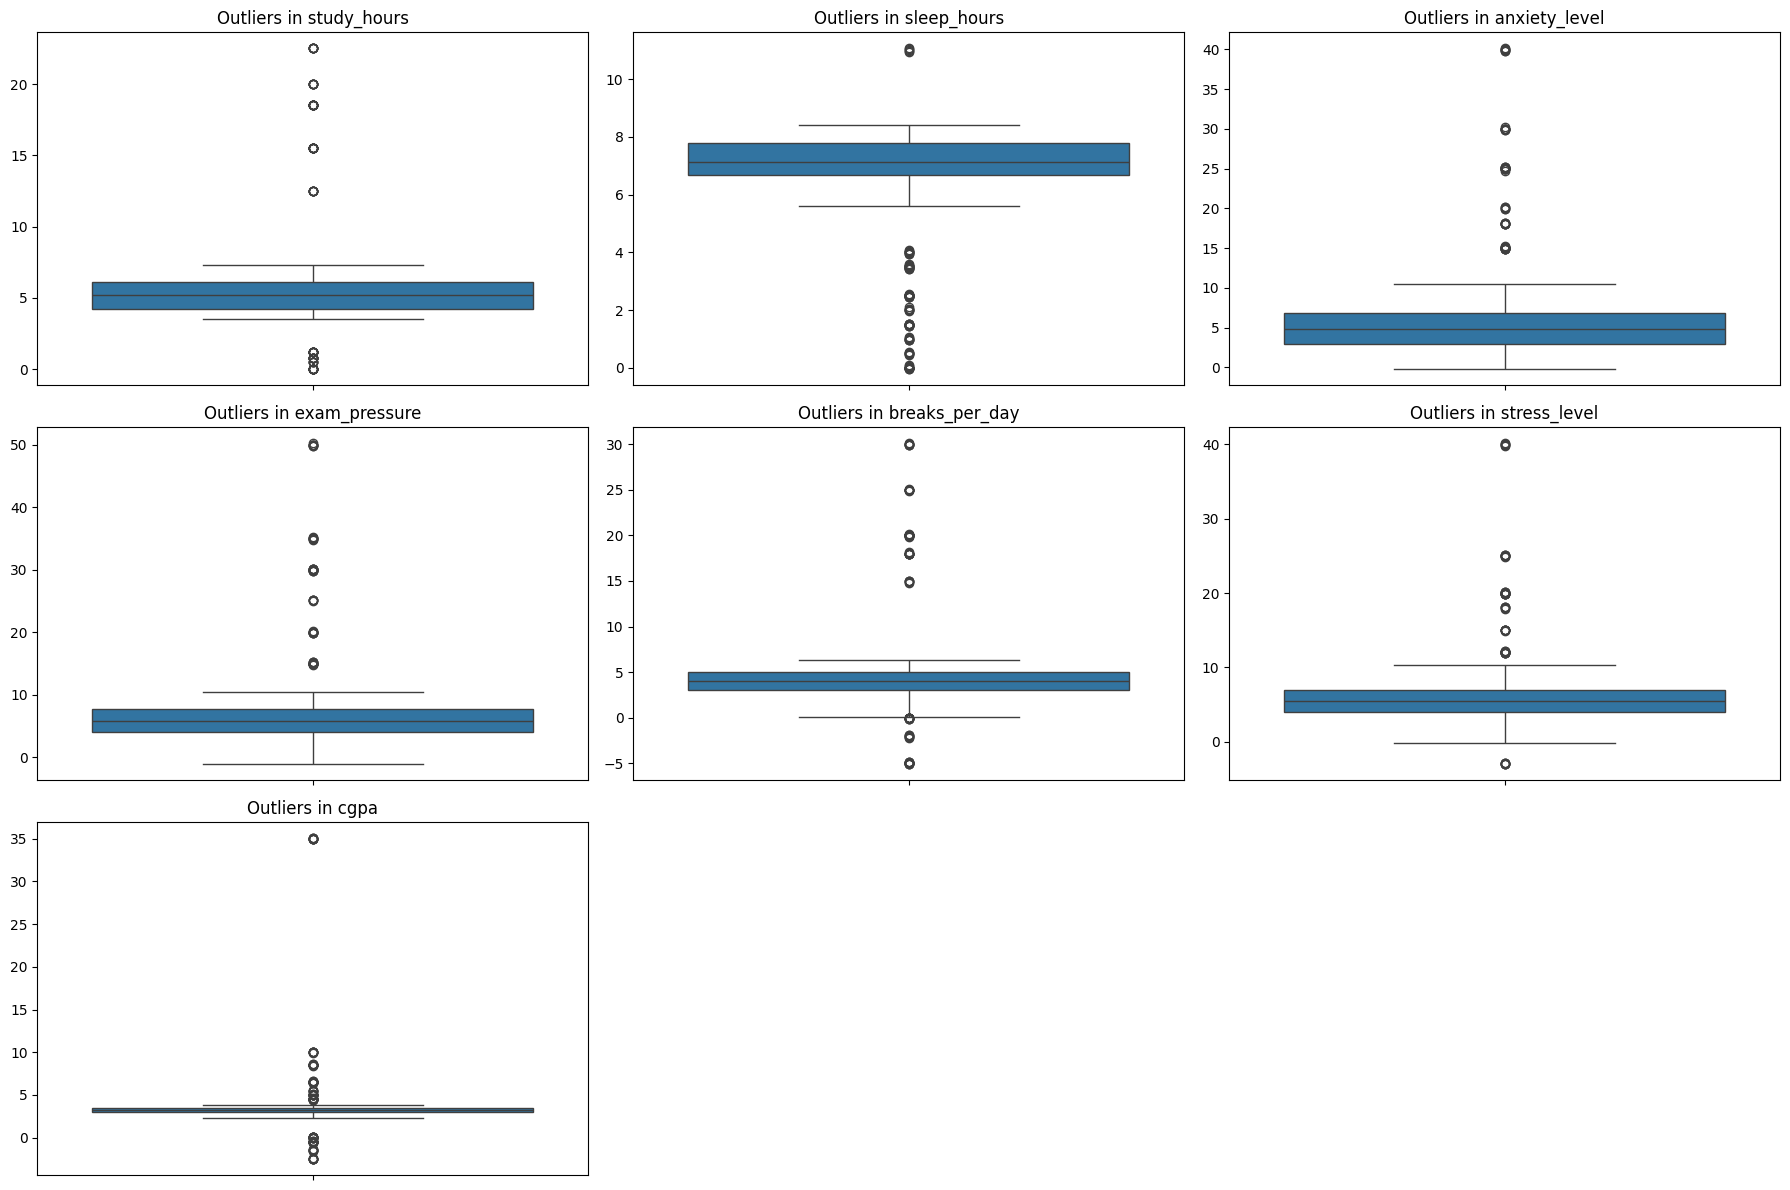

In [90]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i) # Adjust subplot grid as needed based on number of columns
    sns.boxplot(y=data[col])
    plt.title(f'Outliers in {col}')
    plt.ylabel('') # Remove y-label as it's repetitive

plt.tight_layout()
plt.show()

#Outliers Removing Process:

In [91]:
def cap_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    series = series.clip(lower=lower_bound, upper=upper_bound)
    return series

In [92]:
for col in num_cols:
    data[col] = cap_outliers_iqr(data[col])
print("Outlier capping applied to numerical columns.")

Outlier capping applied to numerical columns.


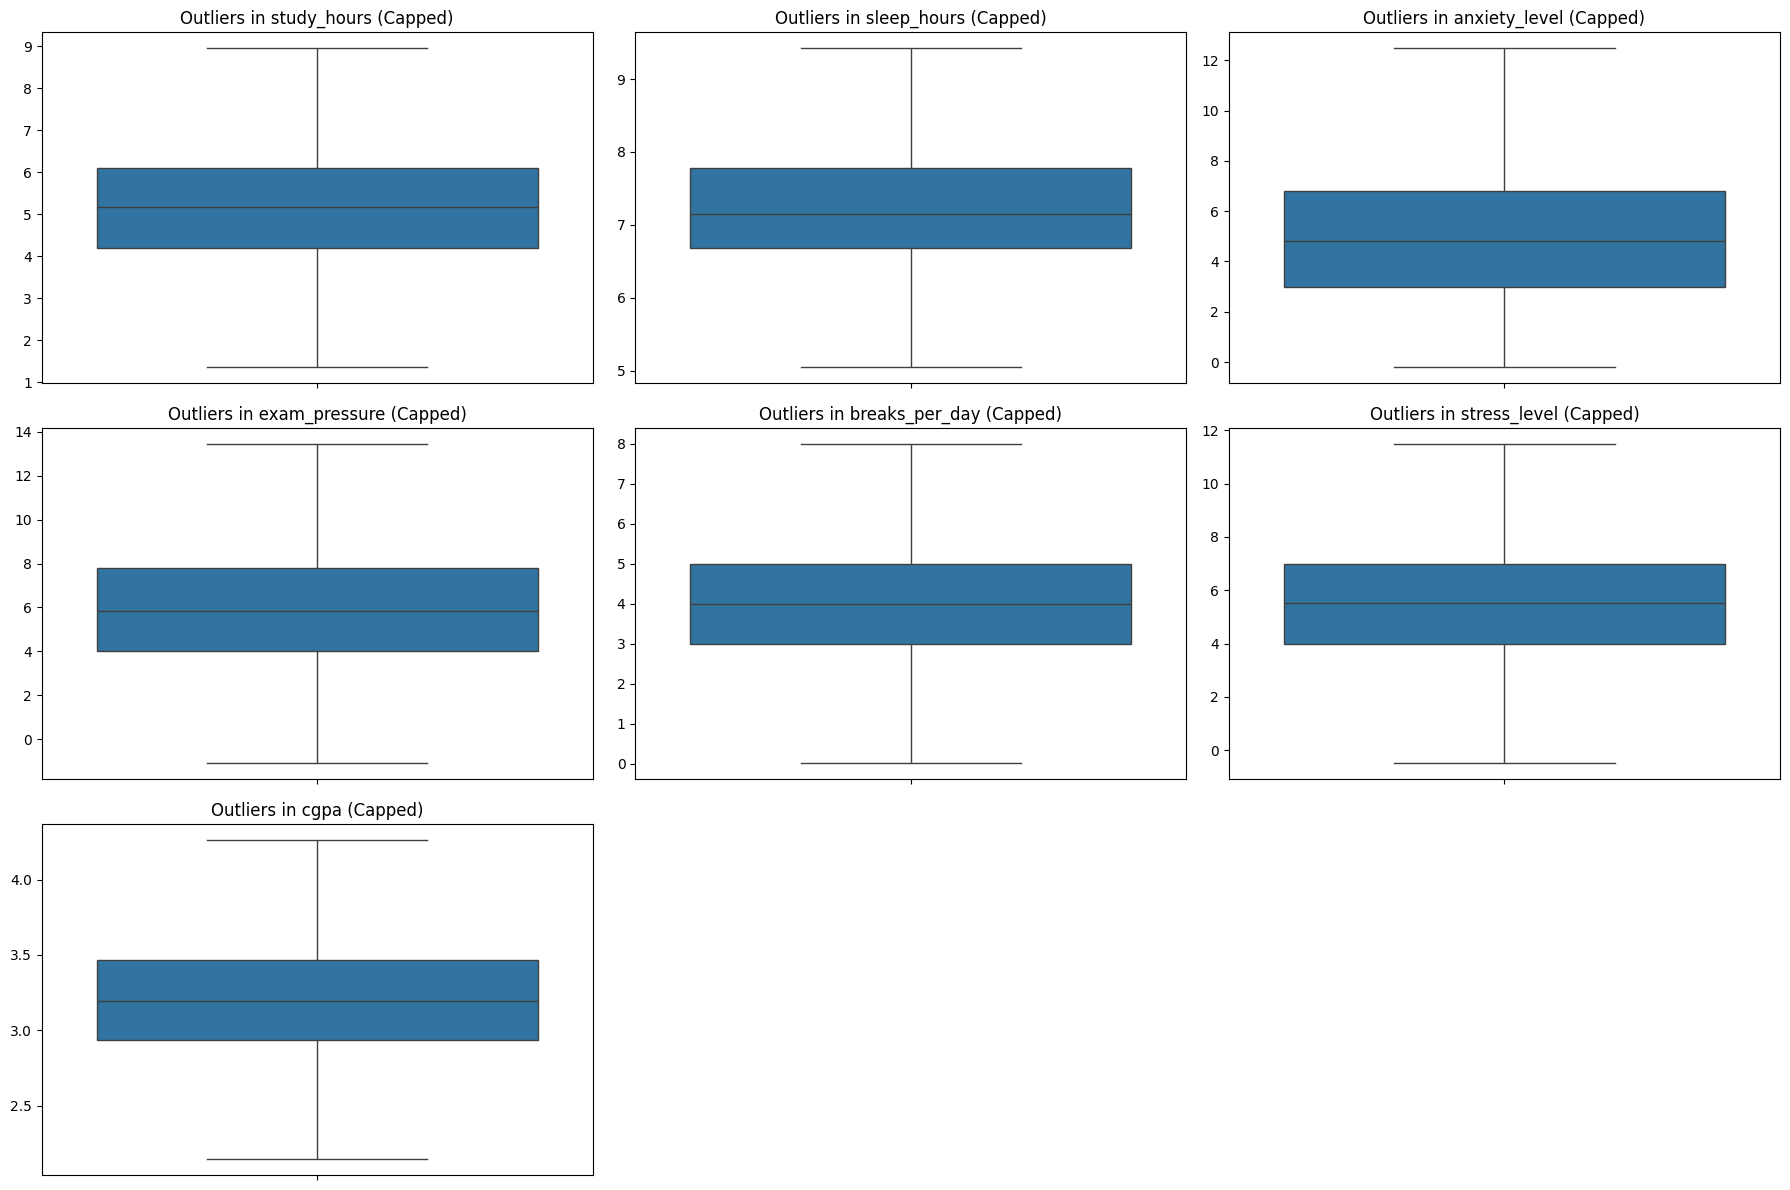

In [93]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Outliers in {col} (Capped)')
    plt.ylabel('')

plt.tight_layout()
plt.show()

#Apply NN

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

nn_model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

nn_model.fit(X_train, y_train);

# Predictions
y_pred = nn_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 0.22718153025213975
RMSE: 0.4741901696492196
R2 Score: 0.9395178653742245


#User Input:

In [95]:
user_input = {
    "study_hours": 5,
    "sleep_hours": 6,
    "anxiety_level": 7,
    "exam_pressure": 8,
    "breaks_per_day": 2,
    "cgpa": 3.0,
    "gender": 1,  # Male=1, Female=0
    "college_name_FAST": 1,
    "college_name_LUMS": 0,
    "college_name_NUST": 0,
    "college_name_PU": 0,
    "college_name_UET": 0
}


#Prediction Function:

In [96]:
import pandas as pd
import numpy as np

def predict(sleep, study, social, physical, screen):
    try:
        data = np.array([[sleep, study, social, physical, screen]])
        data = scaler.transform(data)

        if hasattr(model, "predict_proba"):
            score = model.predict_proba(data)[0][1]
        else:
            score = model.predict(data)[0]

        score = float(score)

        # normalize if needed
        if score > 1:
            score = score / 100

        level = stress_category(score)
        report = generate_report(level)

        return round(score, 2), level, report

    except Exception as e:
        return 0.0, "Error", f"Prediction failed: {str(e)}"


In [99]:
predicted_stress = predict_stress_ann(user_input, nn_model, scaler)
final_report = generate_stress_report(predicted_stress)

print(final_report)


    🧠 STUDENT STRESS ANALYSIS REPORT
    --------------------------------
    Predicted Stress Score : -0.06
    Stress Category        : Low Stress

    RECOMMENDATIONS:
    
- Apna current routine maintain rakhein
- Healthy sleep schedule continue rakhein
- Over-studying se parhez karein


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [100]:
import joblib

joblib.dump(nn_model, "stress_nn_model.pkl")
joblib.dump(scaler, "model.pkl")


['model.pkl']

#Model saving:

In [101]:
import numpy as np
import joblib

model = joblib.load("stress_nn_model.pkl")
scaler = joblib.load("model.pkl")

def predict(sleep, study, social, physical, screen):
    data = np.array([[sleep, study, social, physical, screen]])
    data = scaler.transform(data)

    score = model.predict(data)
    score = float(score[0])

    #  Normalize score (important)
    if score > 1:
        score = score / 100

    level = stress_category(score)
    report = generate_report(level)

    return round(score, 2), level, report


In [103]:
import joblib
scaler = joblib.load("model.pkl")
print("Number of features expected:", scaler.n_features_in_)
if hasattr(scaler, 'feature_names_in_'):
    print("Feature names:", scaler.feature_names_in_)

Number of features expected: 14
Feature names: ['study_hours' 'sleep_hours' 'anxiety_level' 'exam_pressure'
 'breaks_per_day' 'gender' 'cgpa' 'college_name_"UET"'
 'college_name_COMSATS' 'college_name_FAST' 'college_name_LUMS'
 'college_name_NUST' 'college_name_PU' 'college_name_UET']


#Gradio Interface:

In [111]:
import gradio as gr
import numpy as np
import joblib
import pandas as pd

# Load the trained model and scaler
try:
    model = joblib.load("stress_nn_model.pkl")
    scaler = joblib.load("model.pkl")
    print(" Model and scaler loaded successfully!")
except Exception as e:
    print(f" Error loading model: {e}")
    model = None
    scaler = None


def stress_category(score):
    """Categorize stress level based on score"""
    # If model outputs very small values (0-1 range after scaling)
    if score < 1:
        # Treat as normalized 0-1 scale
        if score < 0.35:
            return "Low Stress"
        elif score < 0.65:
            return "Moderate Stress"
        else:
            return "High Stress"
    else:
        # Treat as actual stress level (dataset range: -3 to 40, mostly 2.5-8)
        if score < 4.0:
            return "Low Stress"
        elif score < 6.5:
            return "Moderate Stress"
        else:
            return "High Stress"


def generate_report(level):
    """Generate stress management report based on level"""
    if level == "Low Stress":
        return (
            " Stress Level: Low\n\n"
            "• You are managing stress well.\n"
            "• Maintain 7–8 hours of sleep.\n"
            "• Keep balanced study and social life.\n"
            "• Continue physical activity."
        )

    elif level == "Moderate Stress":
        return (
            " Stress Level: Moderate\n\n"
            "• Take short study breaks.\n"
            "• Reduce screen time before sleep.\n"
            "• Practice meditation or deep breathing.\n"
            "• Increase light physical activity."
        )

    else:
        return (
            " Stress Level: High\n\n"
            "• High stress detected.\n"
            "• Prioritize rest and sleep.\n"
            "• Reduce workload temporarily.\n"
            "• Talk to a counselor or trusted person.\n"
            "• Daily exercise and relaxation is advised."
        )


def predict_stress(study_hours, sleep_hours, anxiety_level, exam_pressure,
                   breaks_per_day, cgpa, gender, college_name):
    """Predict stress level based on user inputs"""

    if model is None or scaler is None:
        return " Error: Model not loaded", "", "Please ensure model files are in the directory."

    try:
        # Encode gender (Male=1, Female=0)
        gender_encoded = 1 if gender == "Male" else 0

        # Create college one-hot encoding matching EXACT training features
        # Order: "UET", COMSATS, FAST, LUMS, NUST, PU, UET
        college_mapping = {
            "COMSATS": [0, 1, 0, 0, 0, 0, 0],
            "FAST":    [0, 0, 1, 0, 0, 0, 0],
            "LUMS":    [0, 0, 0, 1, 0, 0, 0],
            "NUST":    [0, 0, 0, 0, 1, 0, 0],
            "PU":      [0, 0, 0, 0, 0, 1, 0],
            "UET":     [0, 0, 0, 0, 0, 0, 1]
        }
        college_features = college_mapping.get(college_name, [0, 0, 1, 0, 0, 0, 0])  # Default to FAST

        # Create feature array matching EXACT training order
        # ['study_hours', 'sleep_hours', 'anxiety_level', 'exam_pressure',
        #  'breaks_per_day', 'gender', 'cgpa',
        #  'college_name_"UET"', 'college_name_COMSATS', 'college_name_FAST',
        #  'college_name_LUMS', 'college_name_NUST', 'college_name_PU', 'college_name_UET']

        features = [
            study_hours,
            sleep_hours,
            anxiety_level,
            exam_pressure,
            breaks_per_day,
            gender_encoded,
            cgpa
        ] + college_features

        # Convert to DataFrame with exact feature names
        feature_names = [
            'study_hours', 'sleep_hours', 'anxiety_level', 'exam_pressure',
            'breaks_per_day', 'gender', 'cgpa',
            'college_name_"UET"', 'college_name_COMSATS', 'college_name_FAST',
            'college_name_LUMS', 'college_name_NUST', 'college_name_PU', 'college_name_UET'
        ]

        input_df = pd.DataFrame([features], columns=feature_names)

        # Scale the input
        input_scaled = scaler.transform(input_df)

        # Predict
        prediction = model.predict(input_scaled)[0]

        # Get stress score (model directly outputs stress level, not normalized)
        stress_score = float(prediction)

        # Debug: Print raw prediction
        print(f"Raw prediction: {stress_score}")

        # Clamp to reasonable range based on dataset (mostly 2-8)
        stress_score = max(-3, min(40, stress_score))

        # Get stress category using actual score
        level = stress_category(stress_score)

        # Generate report using your function
        report = generate_report(level)

        # Format output - show actual stress score
        score_display = f"{stress_score:.2f}"

        # Generate report using your function
        report = generate_report(level)

        # Format output - show actual stress score
        score_display = f"{stress_score:.2f}"

        return score_display, level, report

    except Exception as e:
        return "Error", "Error", f"Prediction failed: {str(e)}"


# Create Gradio Interface
with gr.Blocks(theme=gr.themes.Soft(), title="Student Stress Detector") as demo:

    gr.Markdown(
        """
        # 🎓 Student Stress Level Detector
        ### AI-Powered Stress Analysis with Personalized Recommendations
        Enter your information to predict your stress level and receive tailored advice.
        """
    )

    with gr.Row():
        with gr.Column():
            gr.Markdown("### 📚 Academic & Lifestyle Inputs")

            study_hours = gr.Number(
                label="Study Hours (per day)",
                value=5.0,
                minimum=0,
                maximum=24
            )

            sleep_hours = gr.Number(
                label="Sleep Hours (per day)",
                value=6.0,
                minimum=0,
                maximum=24
            )

            anxiety_level = gr.Slider(
                minimum=0,
                maximum=10,
                value=5,
                step=1,
                label="Anxiety Level (0-10)"
            )

            exam_pressure = gr.Slider(
                minimum=0,
                maximum=10,
                value=5,
                step=1,
                label="Exam Pressure (0-10)"
            )

        with gr.Column():
            gr.Markdown("### 👤 Personal Information")

            breaks_per_day = gr.Number(
                label="Breaks Per Day",
                value=2,
                minimum=0,
                maximum=20
            )

            cgpa = gr.Number(
                label="CGPA",
                value=3.0,
                minimum=0.0,
                maximum=4.0,
                step=0.01
            )

            gender = gr.Radio(
                choices=["Male", "Female"],
                label="Gender",
                value="Male"
            )

            college_name = gr.Dropdown(
                choices=["COMSATS", "FAST", "LUMS", "NUST", "PU", "UET"],
                label="College Name",
                value="FAST"
            )

    predict_btn = gr.Button("🔍 Predict Stress Level", variant="primary", size="lg")

    gr.Markdown("---")
    gr.Markdown("### 📊 Results")

    with gr.Row():
        with gr.Column(scale=1):
            stress_score = gr.Textbox(
                label="Stress Score",
                interactive=False
            )

        with gr.Column(scale=1):
            stress_level = gr.Textbox(
                label="Stress Level",
                interactive=False
            )

    advice_output = gr.Textbox(
        label="Personalized Advice & Recommendations",
        lines=10,
        interactive=False
    )

    # Set up the prediction
    predict_btn.click(
        fn=predict_stress,
        inputs=[
            study_hours,
            sleep_hours,
            anxiety_level,
            exam_pressure,
            breaks_per_day,
            cgpa,
            gender,
            college_name
        ],
        outputs=[stress_score, stress_level, advice_output]
    )

    gr.Markdown(
        """
        ---
        ### ℹ️ Note
        This tool uses machine learning to predict stress levels based on your inputs.
        It should be used for informational purposes and does not replace professional mental health advice.
        """
    )

# Launch the app
if __name__ == "__main__":
    demo.launch(share=True)

✅ Model and scaler loaded successfully!


/tmp/ipython-input-895744034.py:155: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(theme=gr.themes.Soft(), title="Student Stress Detector") as demo:


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://82d37994cba0218c92.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
